# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

In [5]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/Deep CNN Classifier for any images/data'

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


# 3. Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/Deep CNN Classifier for any images/data')

Found 305 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

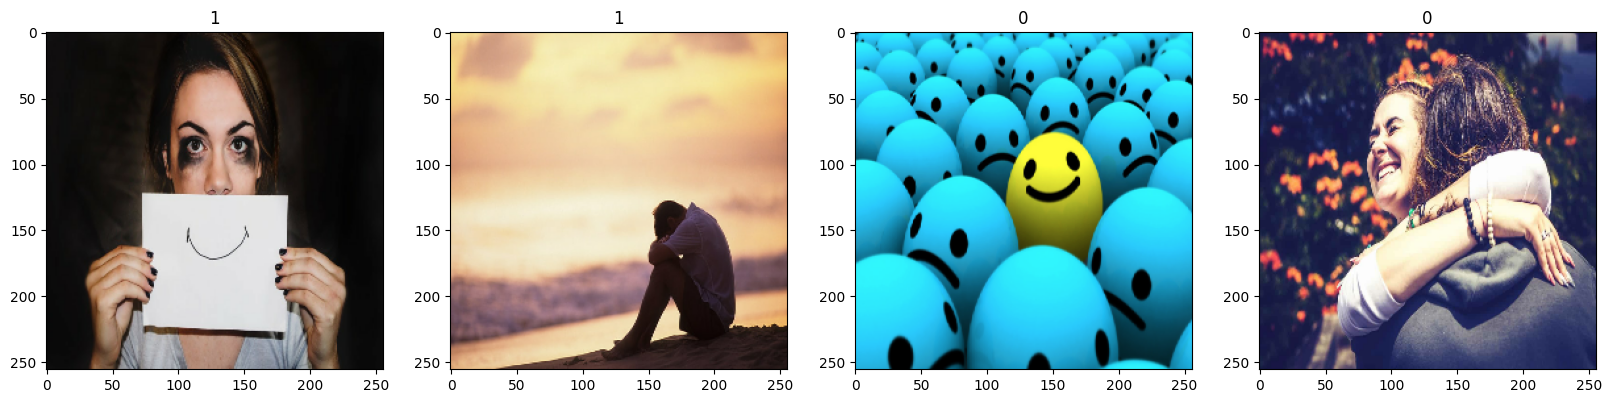

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.37109375, 0.47305453, 0.5397212 ],
          [0.38410297, 0.48606375, 0.55273044],
          [0.3957097 , 0.4976705 , 0.56433713],
          ...,
          [0.8651654 , 0.91614586, 0.9475184 ],
          [0.86131674, 0.9122971 , 0.9436697 ],
          [0.86871934, 0.9196997 , 0.9510723 ]],
 
         [[0.37800246, 0.47996324, 0.5466299 ],
          [0.38702095, 0.48898172, 0.5556484 ],
          [0.392972  , 0.49493277, 0.56159943],
          ...,
          [0.86337316, 0.91435355, 0.9457261 ],
          [0.86197495, 0.91295534, 0.9443279 ],
          [0.86871934, 0.9196997 , 0.9510723 ]],
 
         [[0.38681173, 0.4887725 , 0.5554392 ],
          [0.3882353 , 0.49019608, 0.5568628 ],
          [0.38916972, 0.4911305 , 0.5577972 ],
          ...,
          [0.86124384, 0.9122243 , 0.94359684],
          [0.85807294, 0.9090533 , 0.9404259 ],
          [0.86573225, 0.91671264, 0.9480852 ]],
 
         ...,
 
         [[0.28627452, 0.37254903, 0.42745098],
          [0.28966

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 23s 3s/step - loss: 1.4239 - accuracy: 0.4777 - val_loss: 0.6970 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 23s 3s/step - loss: 0.6975 - accuracy: 0.5223 - val_loss: 0.6705 - val_accuracy: 0.7031
Epoch 3/20
7/7 [==============================] - 21s 3s/step - loss: 0.6381 - accuracy: 0.7500 - val_loss: 0.4974 - val_accuracy: 0.8438
Epoch 4/20
7/7 [==============================] - 33s 4s/step - loss: 0.5957 - accuracy: 0.7098 - val_loss: 0.4529 - val_accuracy: 0.8125
Epoch 5/20
7/7 [==============================] - 28s 3s/step - loss: 0.4769 - accuracy: 0.7902 - val_loss: 0.4959 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 23s 3s/step - loss: 0.5113 - accuracy: 0.7366 - val_loss: 0.4487 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 23s 3s/step - loss: 0.4051 - accuracy: 0.8571 - val_loss: 0.2933 - val_accuracy: 0.9219
Epoch 8/20
7/7 [==================

# 8. Plot Performance

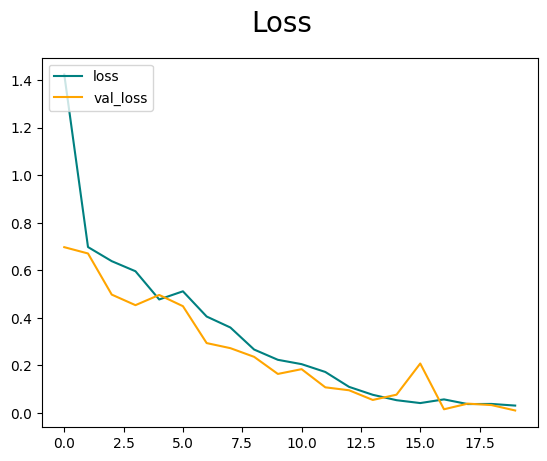

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

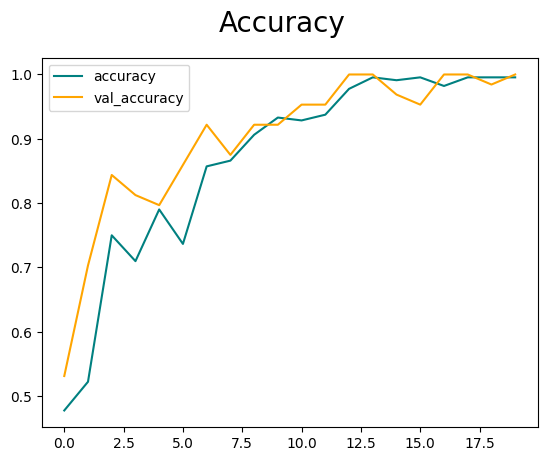

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 912ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [33]:
import cv2

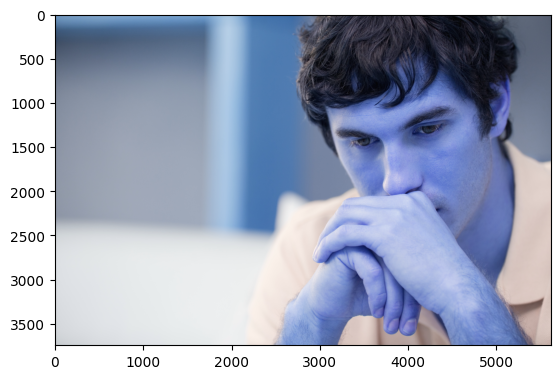

In [36]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Deep CNN Classifier for any images/example_test_image.jpg')
plt.imshow(img)
plt.show()

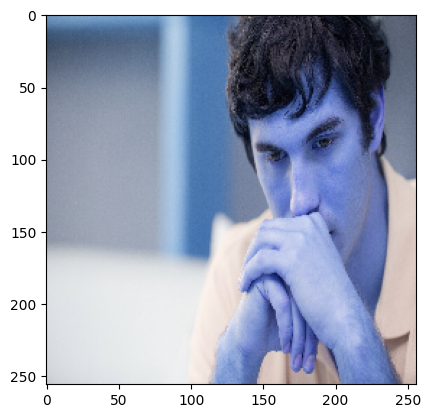

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 42ms/step


In [39]:
yhat

array([[0.9968923]], dtype=float32)

In [40]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifier.h5'))

In [45]:
new_model = load_model('/content/drive/MyDrive/Colab Notebooks/Deep CNN Classifier for any images/models/imageclassifier.h5')

In [46]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 165ms/step


array([[0.99676615]], dtype=float32)